In [4]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from IPython.core.pylabtools import figsize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math
# https://coolors.co/palette/e0fbfc-c2dfe3-9db4c0-5c6b73-253237
# https://coolors.co/palettes/popular/green

/Users/mauricio-reportei/TCC-Project/drop-and-send/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [15]:
# Série
dado=pd.read_csv('velocidade.csv', header=0)
dado['velocidade'] = dado['velocidade'].str.replace(',', '.')
dado['velocidade'] = pd.to_numeric(dado['velocidade'], errors='coerce')


   velocidade
0    2.590654
1    2.998729
2    3.387820
3    3.785856
4    4.390598
<class 'pandas.core.series.Series'>
RangeIndex: 547 entries, 0 to 546
Series name: velocidade
Non-Null Count  Dtype  
--------------  -----  
547 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB
None


In [19]:

dado['velocidade'] = dado['velocidade'].fillna(dado.mean())

print(dado['velocidade'].describe())


count    547.000000
mean       2.958240
std        1.129113
min        1.004245
25%        1.983963
50%        2.968711
75%        3.933421
max        4.998175
Name: velocidade, dtype: float64


<Axes: >

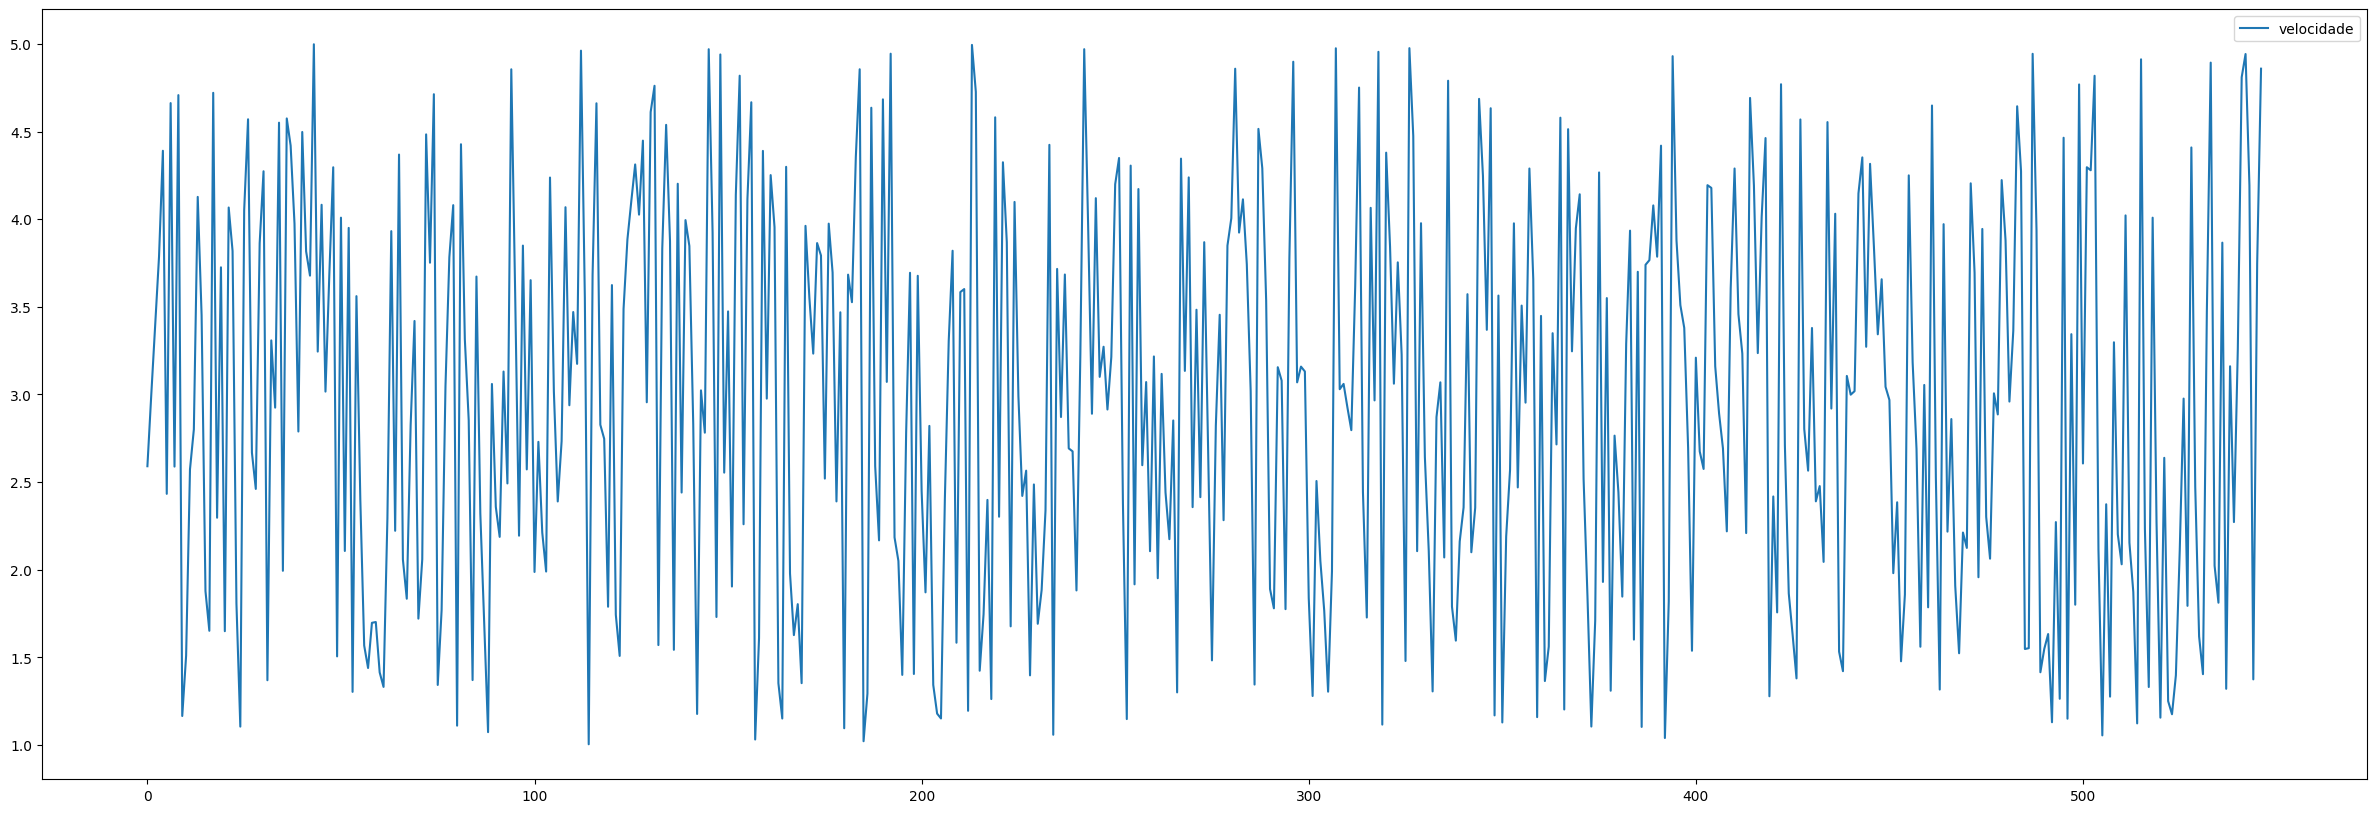

In [20]:
# Plota a imagem
figsize(30,10)
dado.plot()

In [ ]:
# from numpy.lib.index_tricks import index_exp

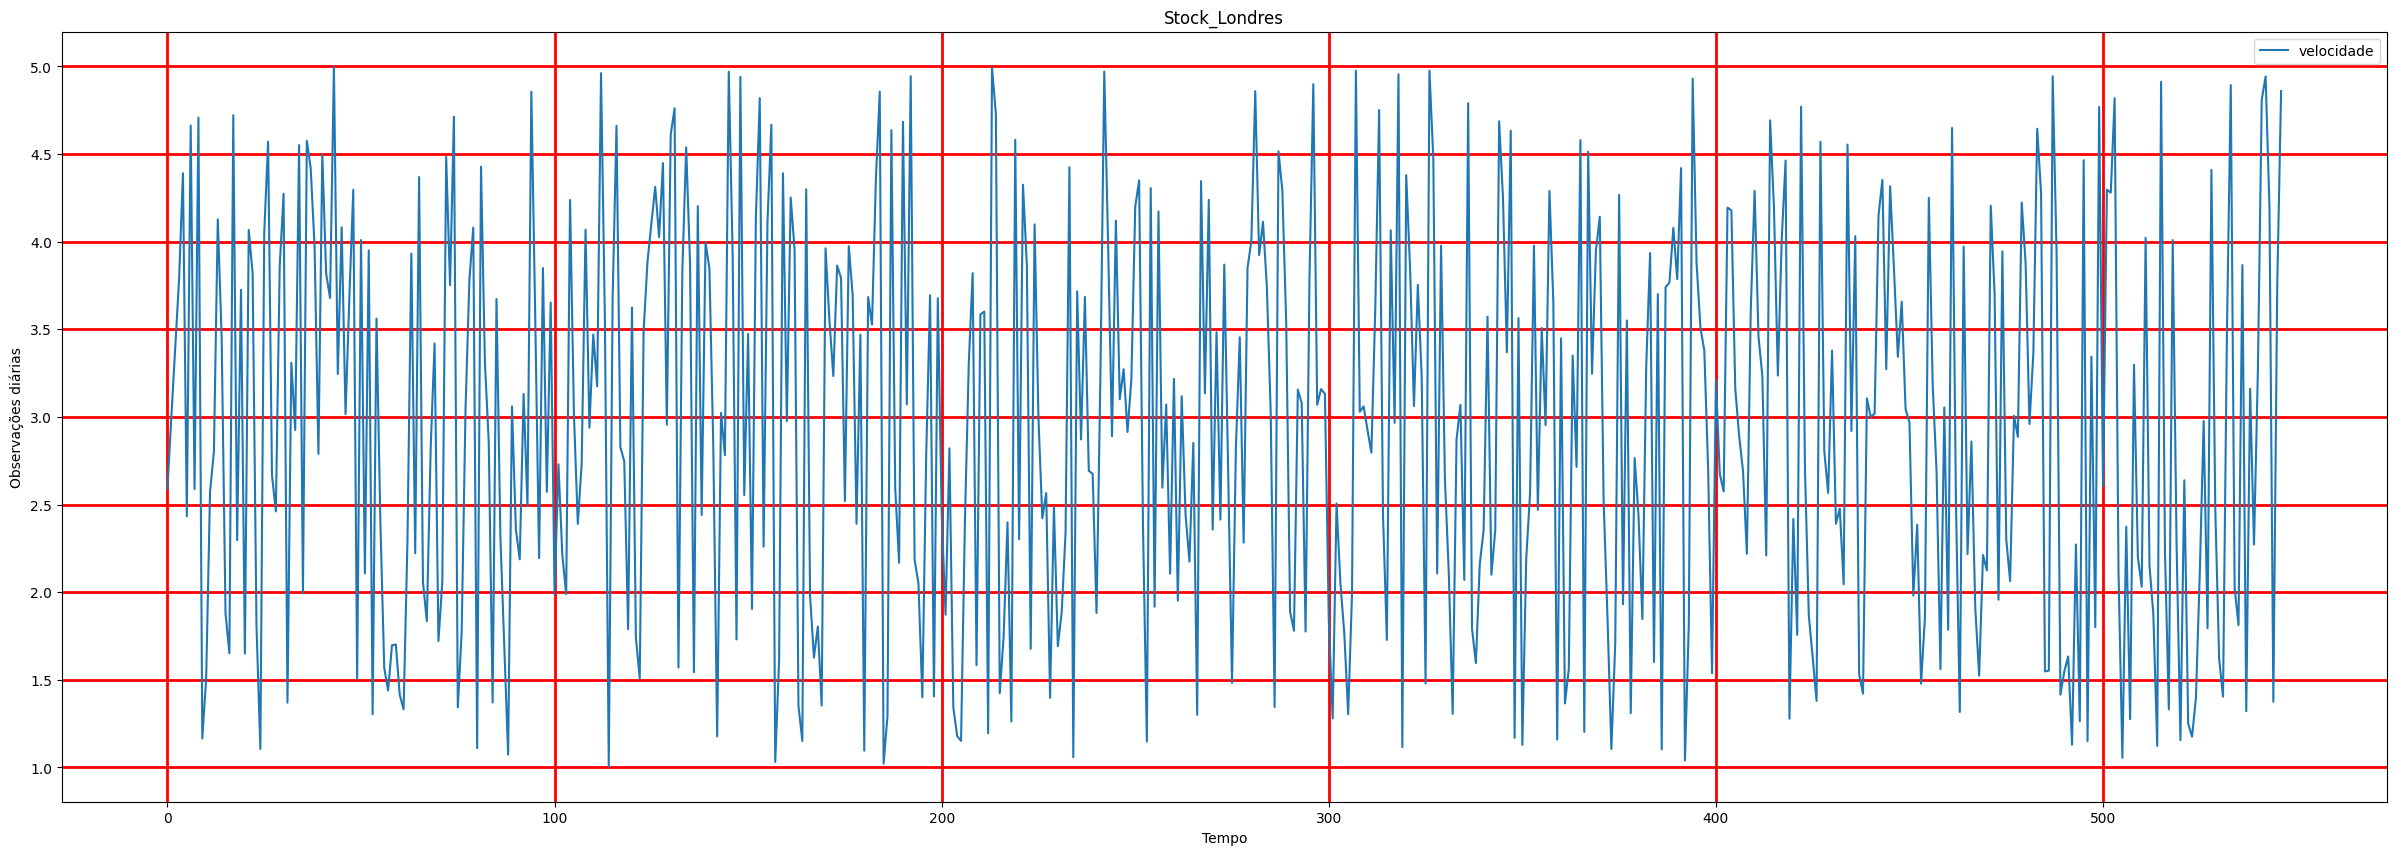

In [22]:
# Plota a imagem
dado.plot()
plt.xlabel('Tempo')
plt.ylabel('Observações diárias')
plt.title('Stock_Londres')
plt.grid(True, which='both', axis='both', color='r', linestyle='-', linewidth=2)

In [24]:
# Cálculo das principais características da série no tempo
estatistica = dado.describe()
print(estatistica)

       velocidade
count  547.000000
mean     2.958240
std      1.129113
min      1.004245
25%      1.983963
50%      2.968711
75%      3.933421
max      4.998175


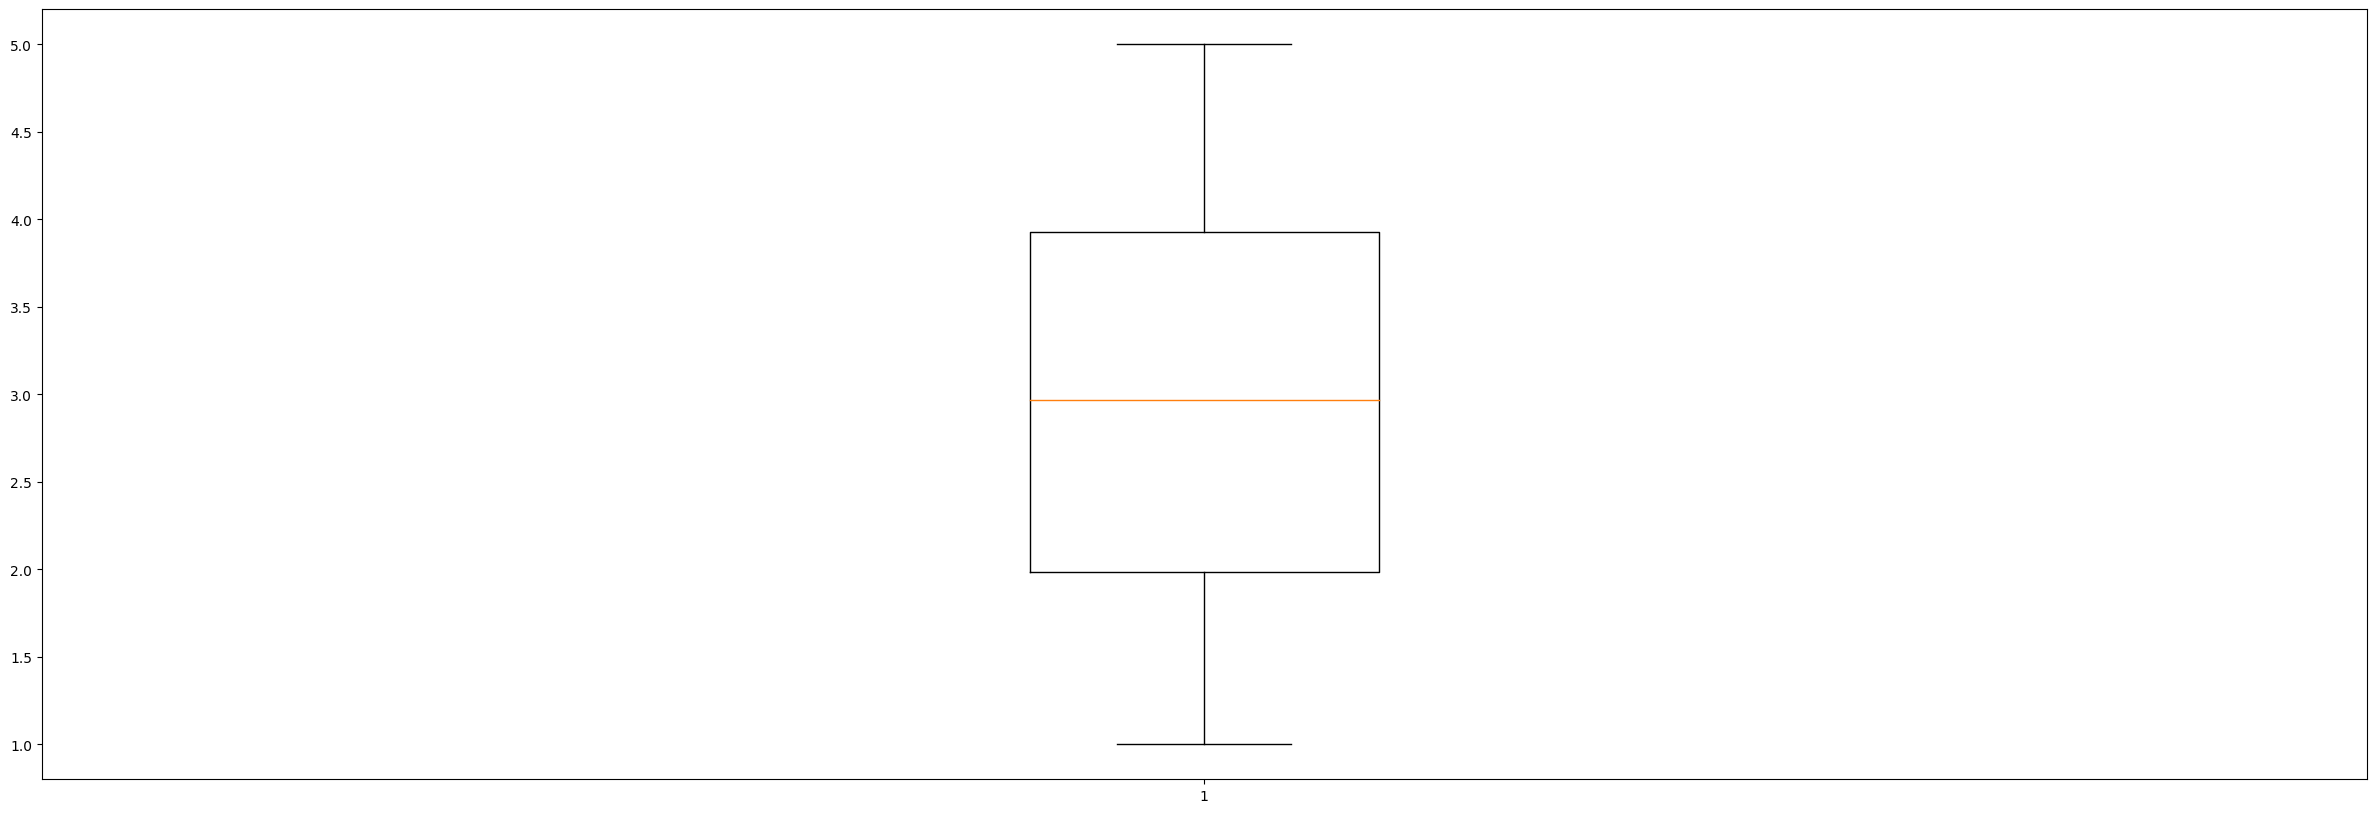

In [ ]:
# Boxplot
plt.boxplot(dado)
#dado.boxplot()
plt.show()

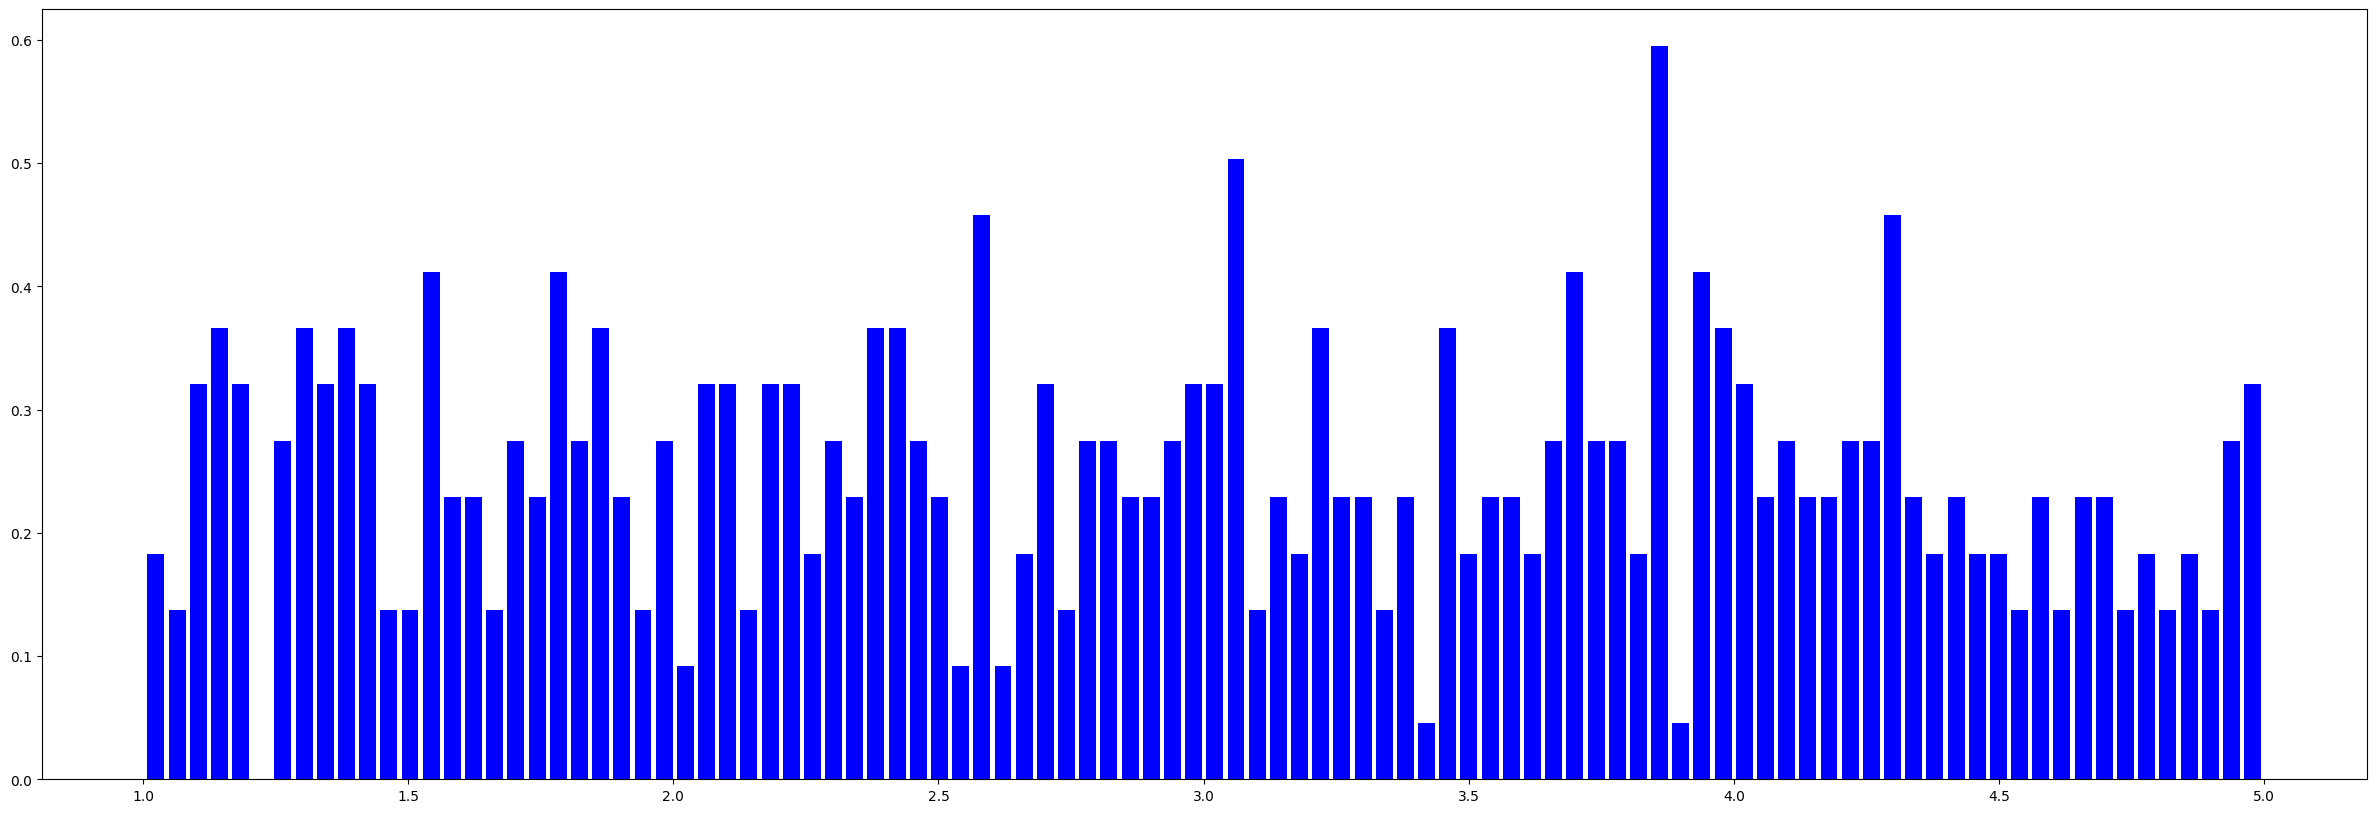

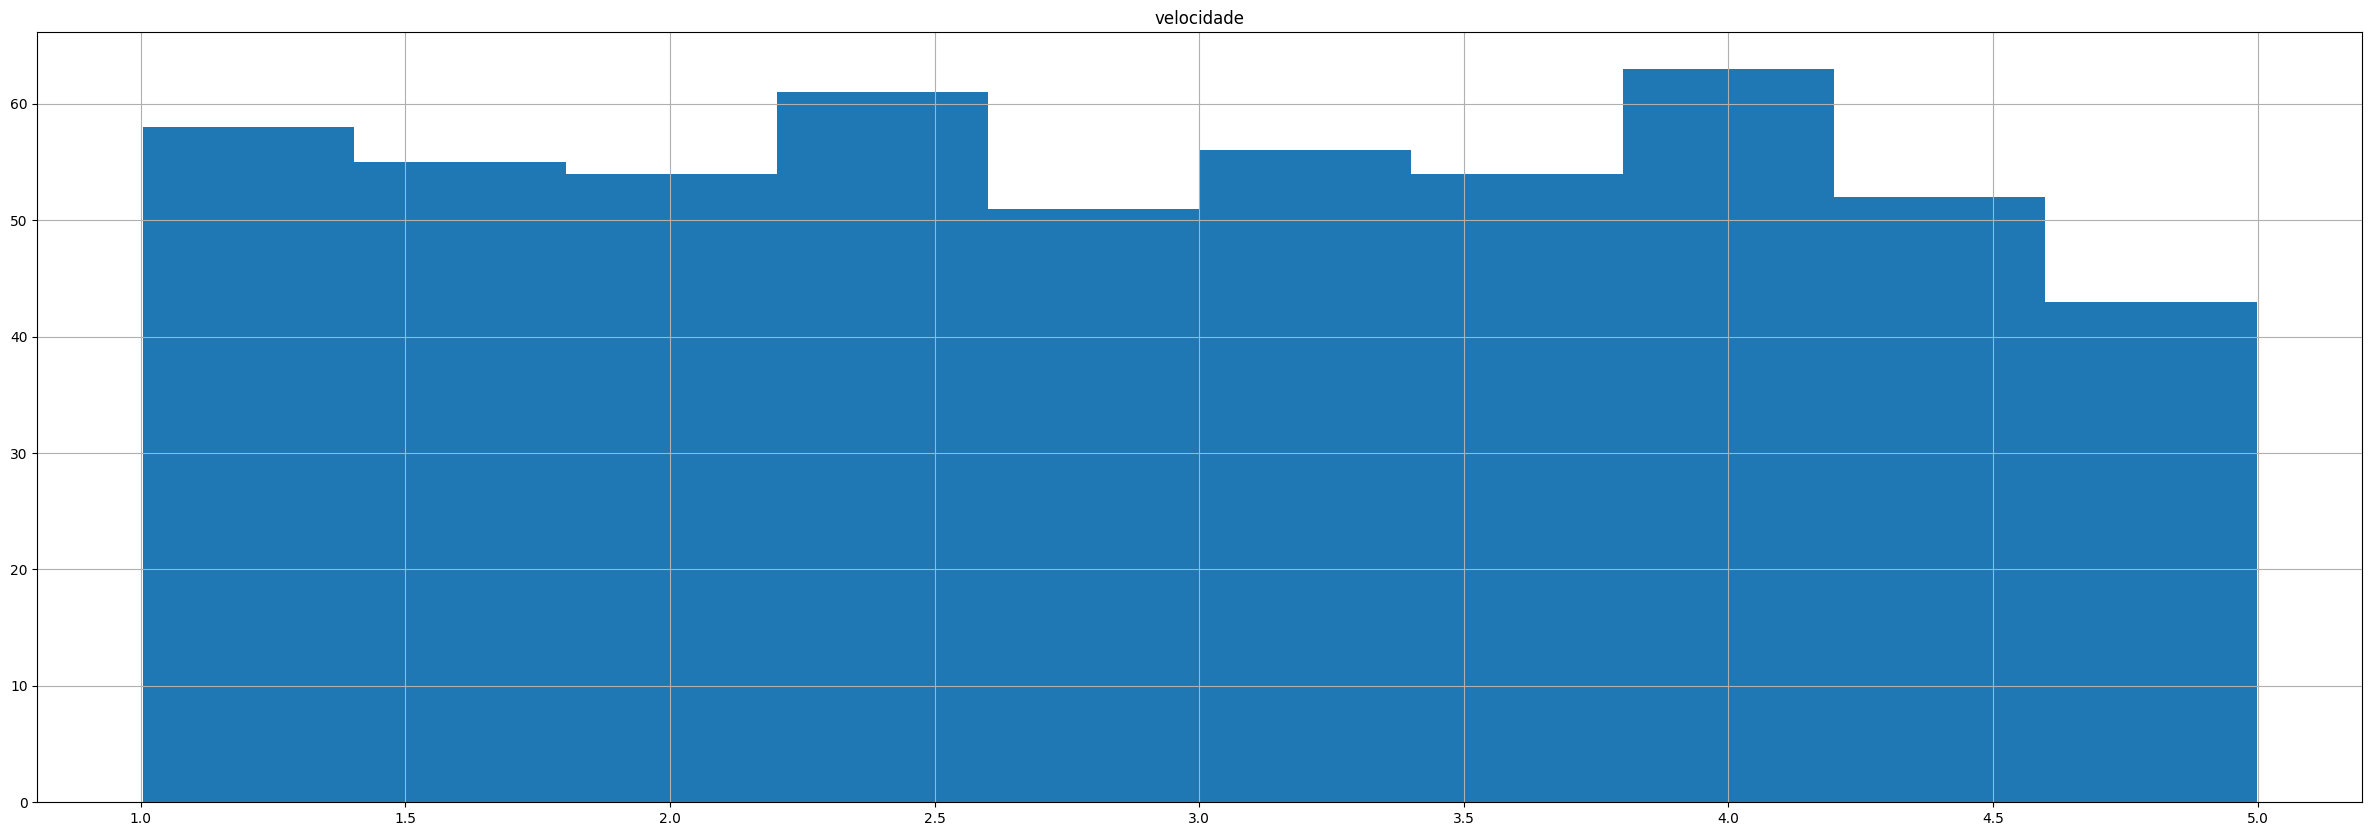

In [27]:
# Análise da distribuição dos dados: Histograma
plt.hist(dado,100, density=True, rwidth=0.8,color='blue')
plt.show()
# dado.hist()

In [29]:
media=estatistica.iloc[1]
media

velocidade    2.95824
Name: mean, dtype: float64

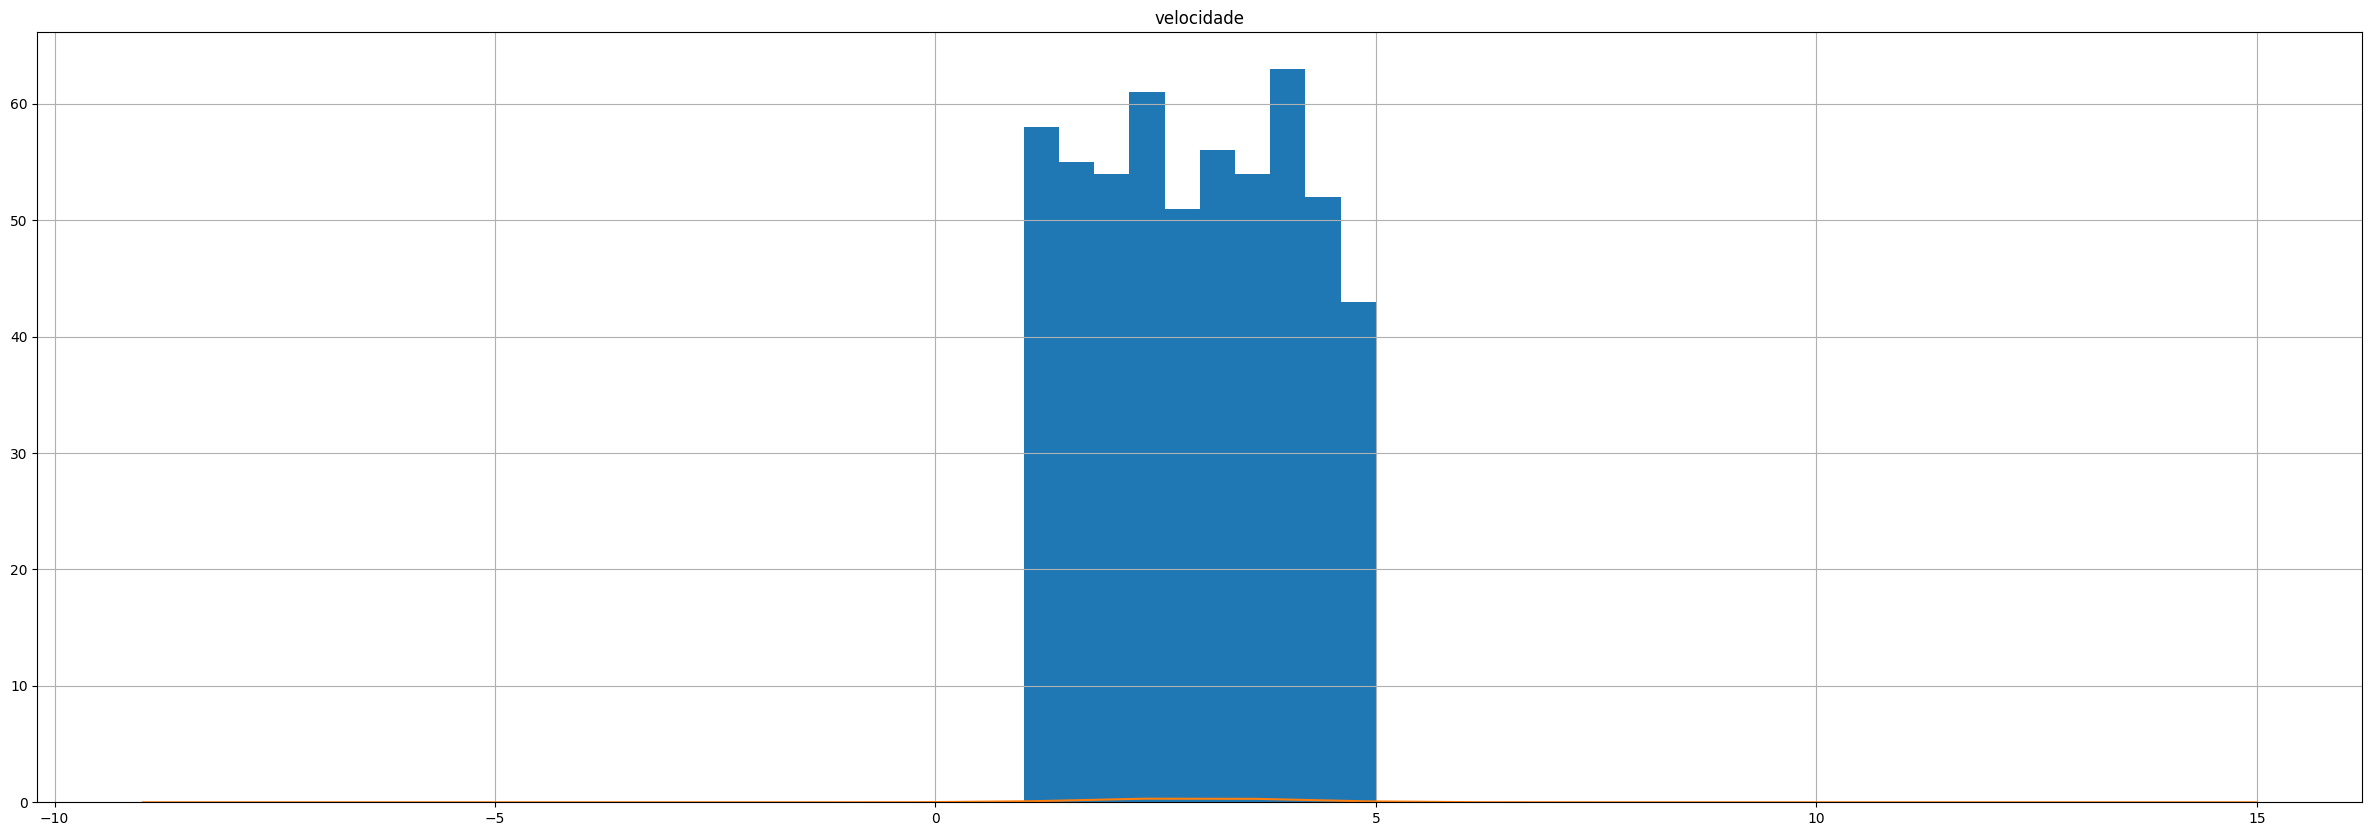

In [30]:
# Análise da distribuição dos dados
#plt.hist(dado, 100, density=True, rwidth=0.8,color='blue')
dado.hist()
eixox = np.linspace(estatistica.iloc[3]-10,estatistica.iloc[7]+10,20)
eixoy = norm.pdf(eixox,estatistica.iloc[1],estatistica.iloc[2])
plt.plot(eixox,eixoy)
plt.show()

In [33]:
# Teste de normalidade: Shapiro - Wilk
sh_stat , sh_p_valor = stats.shapiro(dado)
print(sh_stat)
print(sh_p_valor)

0.9577244618154386
2.0171699299388043e-11


In [34]:
if sh_p_valor>0.05:
  print('Com 95% de confiança, os dados são similadres a uma distribuição normal, de acordo com o teste Shapiro-Wilk')
else:
  print('Com 95% de confiança, os dados não são similadres a uma distribuição normal, de acordo com o teste Shapiro-Wilk')


Com 95% de confiança, os dados não são similadres a uma distribuição normal, de acordo com o teste Shapiro-Wilk


In [35]:
# Teste de Estacionariedade
data = np.squeeze(np.array(dado))
print(np.shape(data))
type(data)

(547,)


numpy.ndarray

In [37]:
# Teste KPSS
from statsmodels.tsa.stattools import kpss
estatistica_sm, valor_p_sm , n_atrasos_sm , val_criticos_sm = kpss(data)
print(estatistica_sm)
print(valor_p_sm)
print(n_atrasos_sm)
print(val_criticos_sm)

0.2121059622964608
0.1
6
{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/mw/vqh88vyx6x32dqqhv_llzfzw0000gn/T/ipykernel_14680/940745239.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  estatistica_sm, valor_p_sm , n_atrasos_sm , val_criticos_sm = kpss(data)


In [38]:
# Primeira hipótese
if valor_p_sm <0.05 :
  print('A série não é estacionária')
else:
  print('A série é estacionária')

A série é estacionária


In [39]:
# Segunda hipótese: Considerando 99% de significância
if estatistica_sm > 0.739:
  print('A série não é estacionária')
else:
  print('A série é estacionária')

A série é estacionária


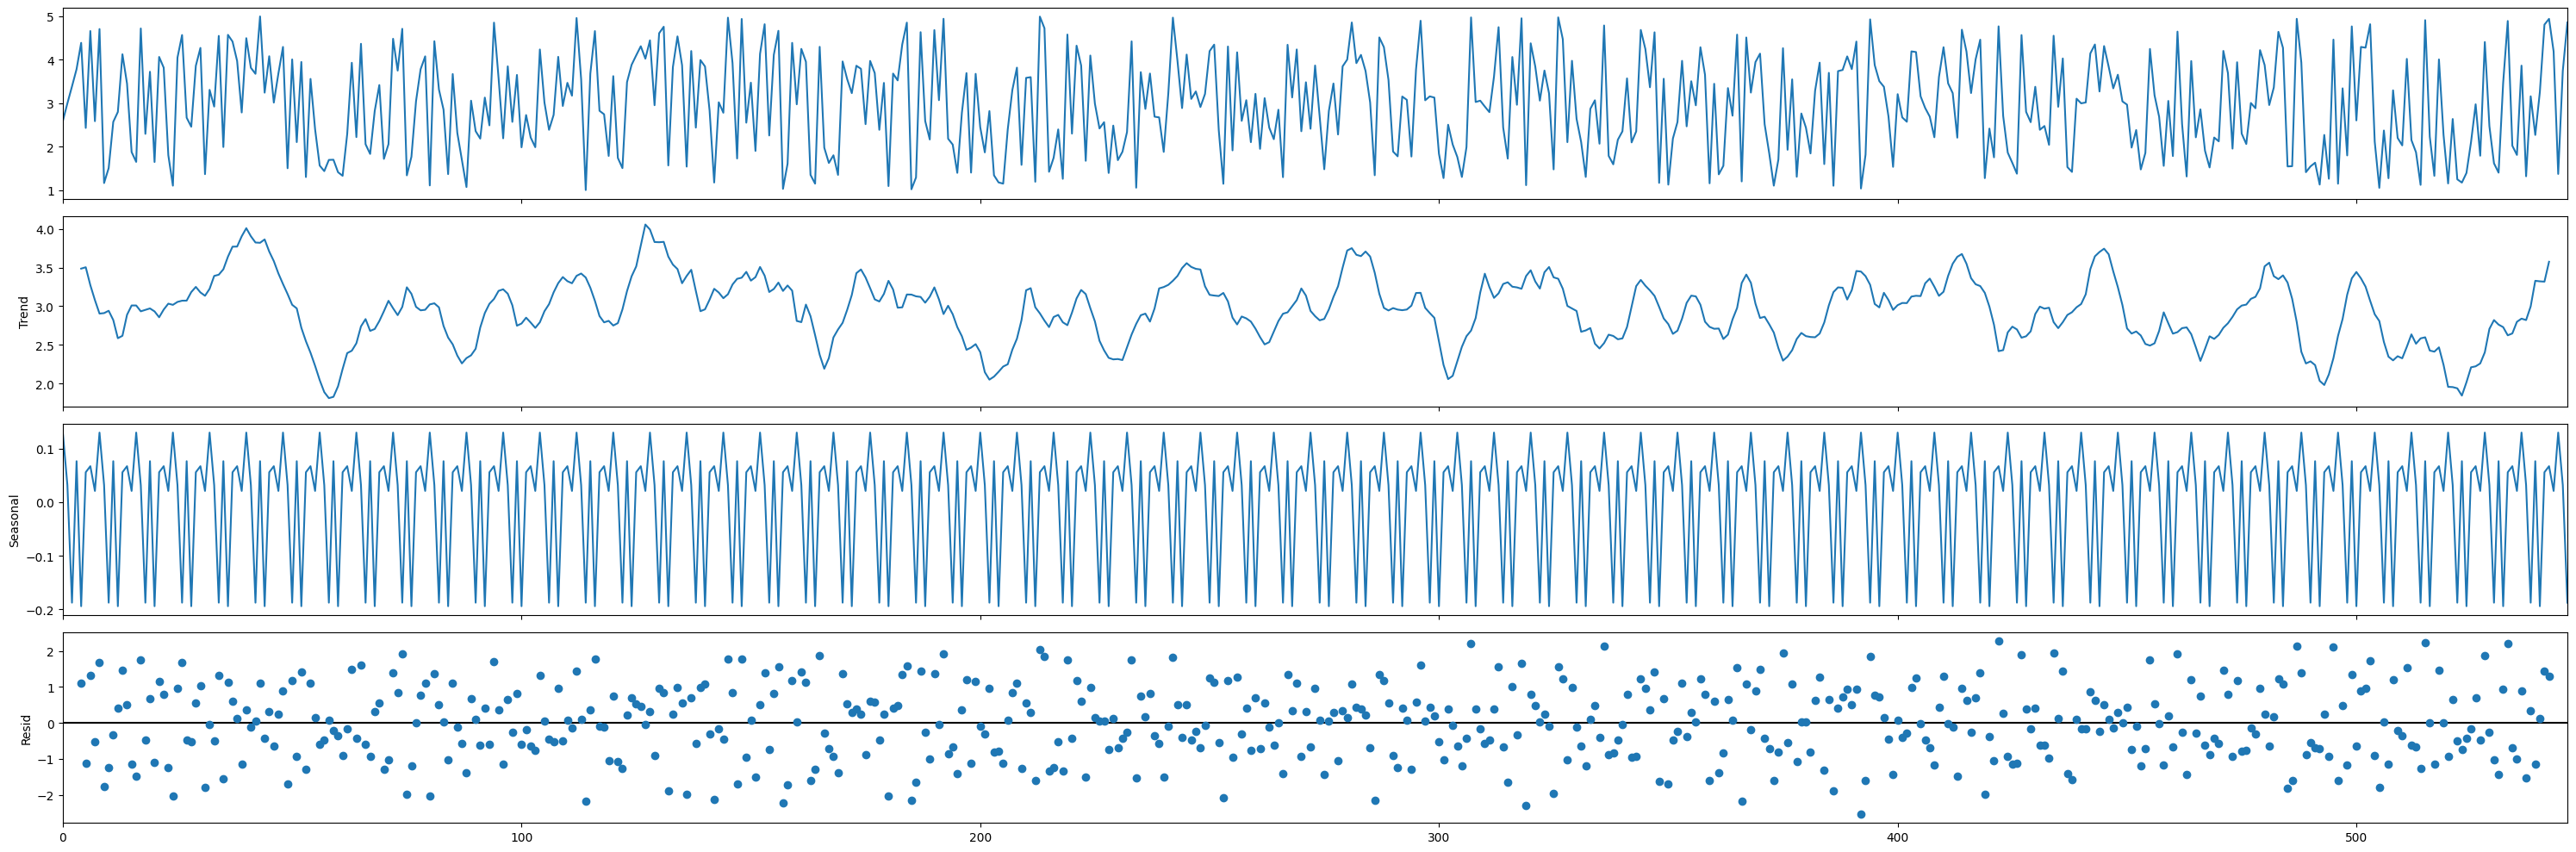

In [40]:
# Decomposição
figsize(30,10)
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dado, model='additive',period=8)
decomposition.plot()
plt.show()

[]

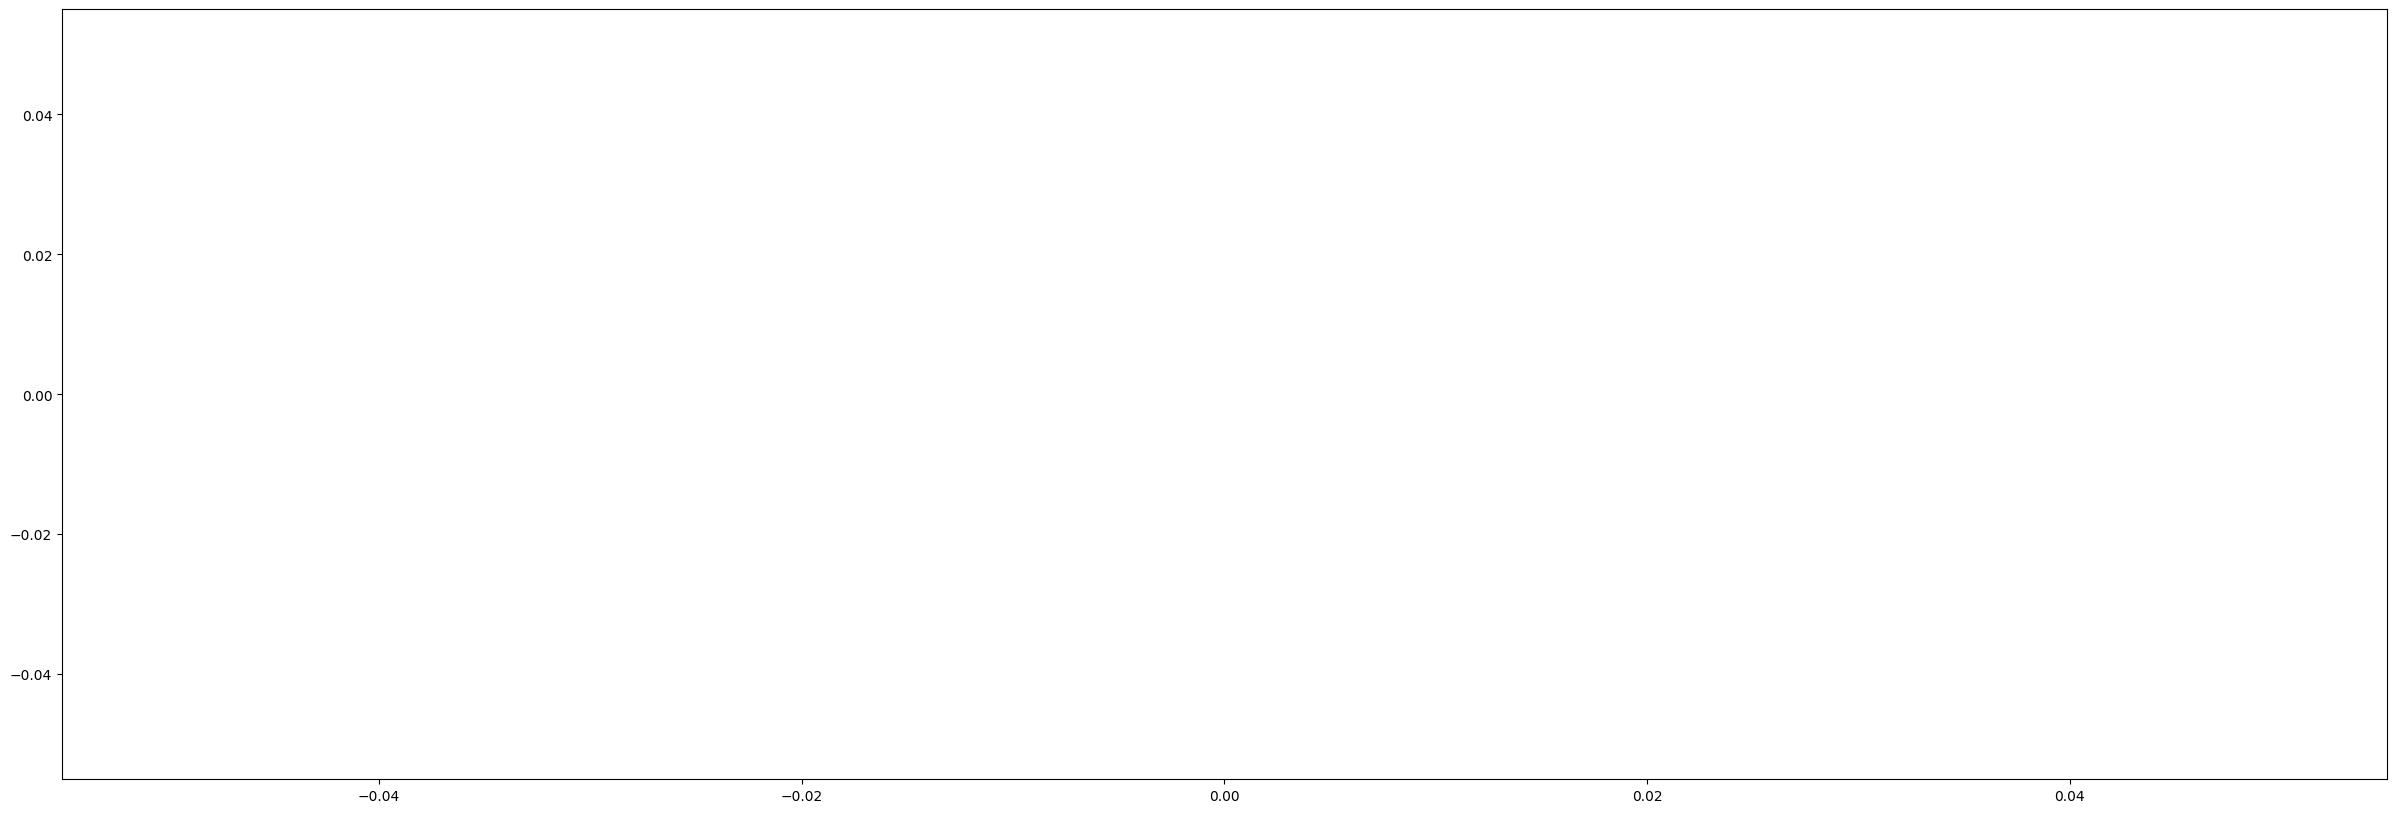

In [ ]:
# Diferenciação
y_diff = np.diff(dado)
plt.plot(y_diff)

In [ ]:
# Teste KPSS
from statsmodels.tsa.stattools import kpss
estatistica_sm, valor_p_sm , n_atrasos_sm , val_criticos_sm = kpss(y_diff)
print(estatistica_sm)
print(valor_p_sm)
print(n_atrasos_sm)
print(val_criticos_sm)

ValueError: cannot reshape array of size 0 into shape (547,)

In [ ]:
# Primeira hipótese
if valor_p_sm <0.05 :
  print('A série não é estacionária')
else:
  print('A série é estacionária')

A série é estacionária


In [ ]:
# Segunda hipótese: Considerando 99% de significância
if estatistica_sm > 0.739:
  print('A série não é estacionária')
else:
  print('A série é estacionária')

A série é estacionária


In [ ]:
# Suavização simples (sem tendência e sem sazonalidade)
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing , Holt

In [ ]:
fit1=SimpleExpSmoothing(dado).fit(smoothing_level = 0.2, optimized = False)
fcast1 = fit1.forecast(12).rename(r'$alpha=0.2$')

<Axes: >

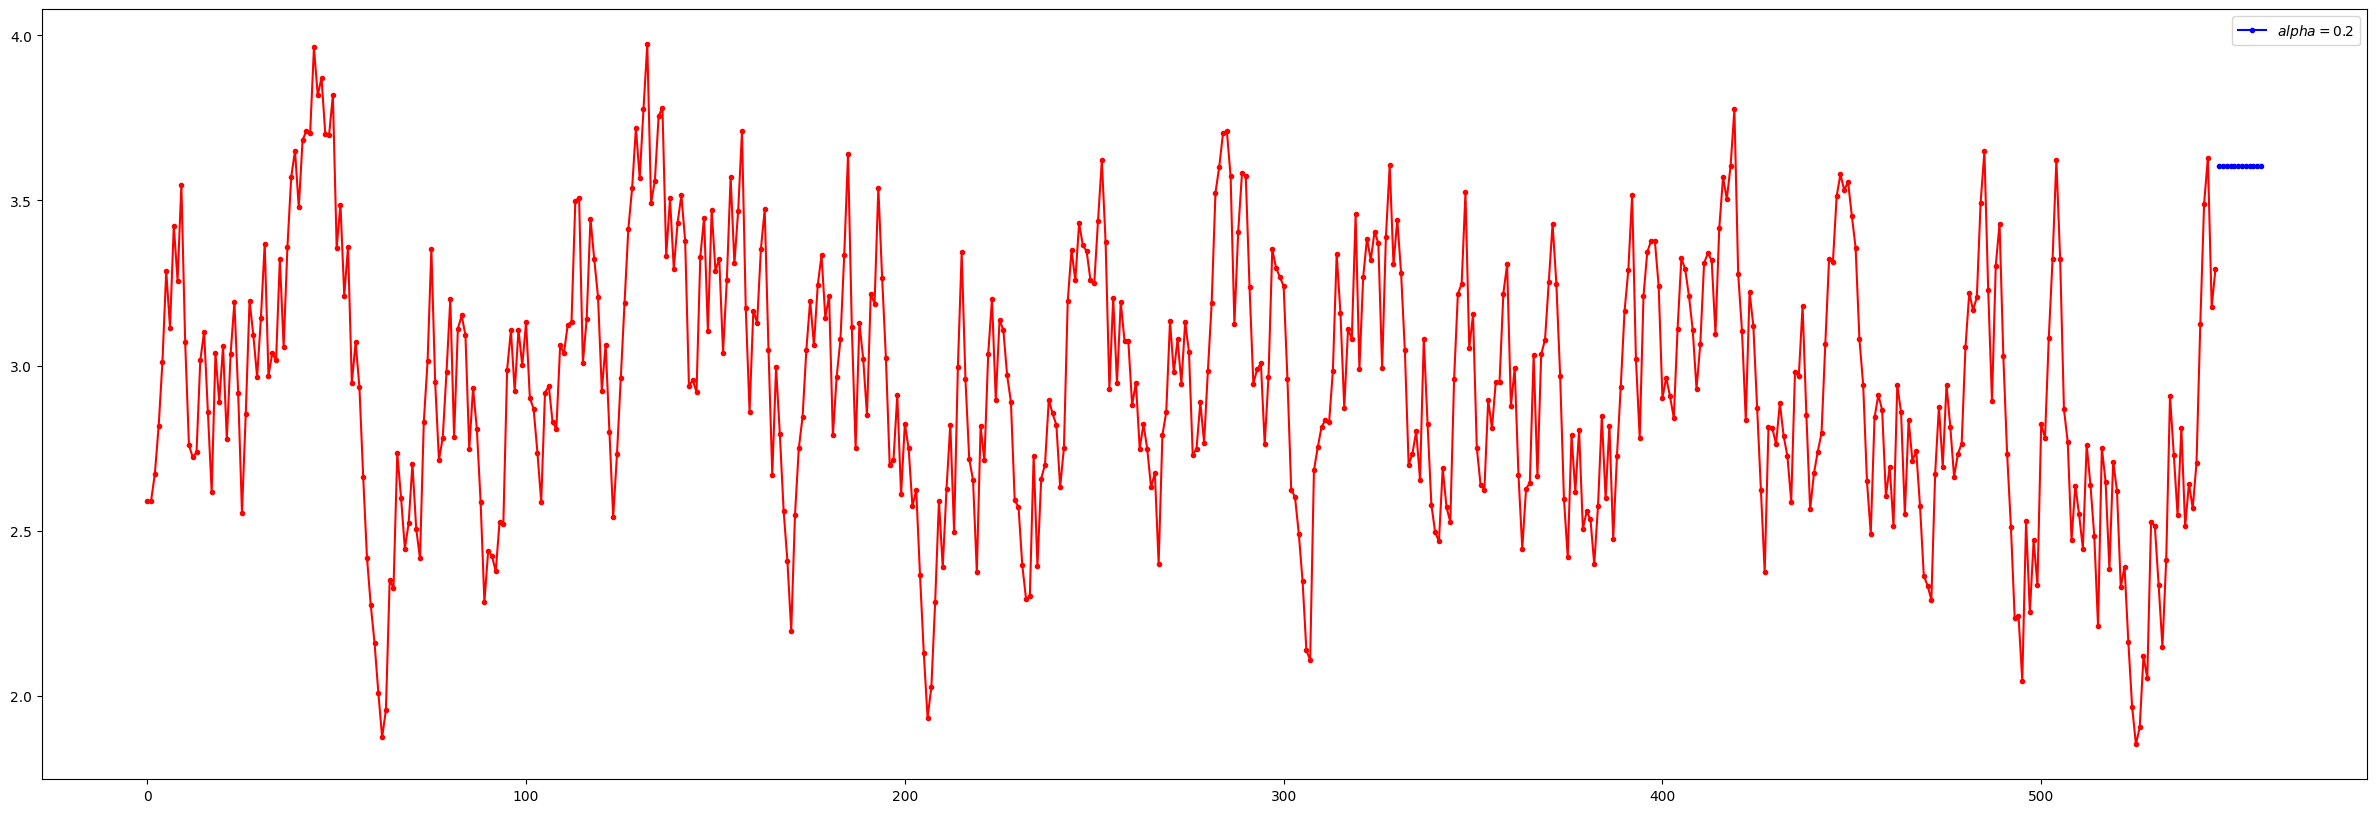

In [ ]:
fcast1.plot(marker='.', color='blue', legend = True)
fit1.fittedvalues.plot(marker='.', color='red')

<ipython-input-97-abaf0ec48030>:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit2=Holt(dado).fit(smoothing_level = 0.8, smoothing_slope = 0.2, optimized = False)


<Axes: >

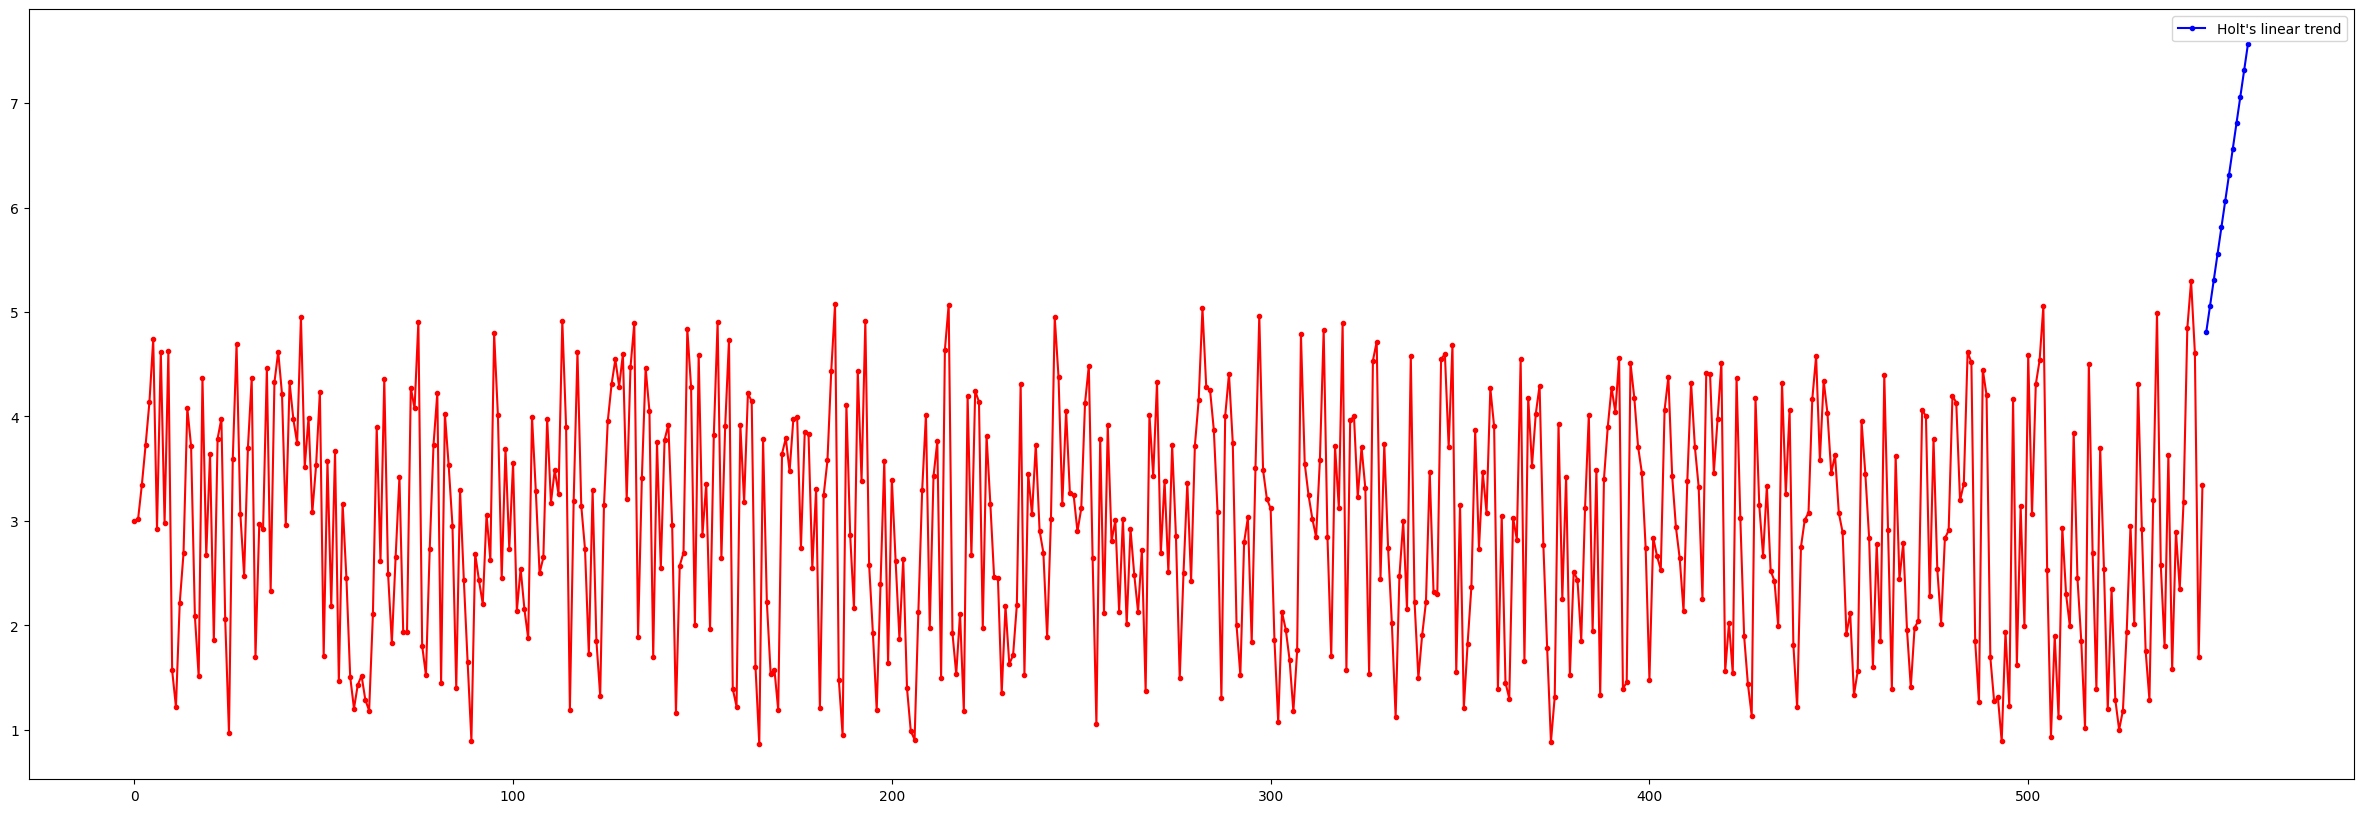

In [ ]:
# Suavização de Holt
fit2=Holt(dado).fit(smoothing_level = 0.8, smoothing_slope = 0.2, optimized = False)
fcast2 = fit2.forecast(12).rename("Holt's linear trend")
fcast2.plot(marker='.', color='blue', legend = True)
fit2.fittedvalues.plot(marker='.', color='red')

<ipython-input-98-353fec007f8a>:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  fit3=Holt(dado, damped = True).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
<ipython-input-98-353fec007f8a>:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit3=Holt(dado, damped = True).fit(smoothing_level = 0.8, smoothing_slope = 0.2)


<Axes: >

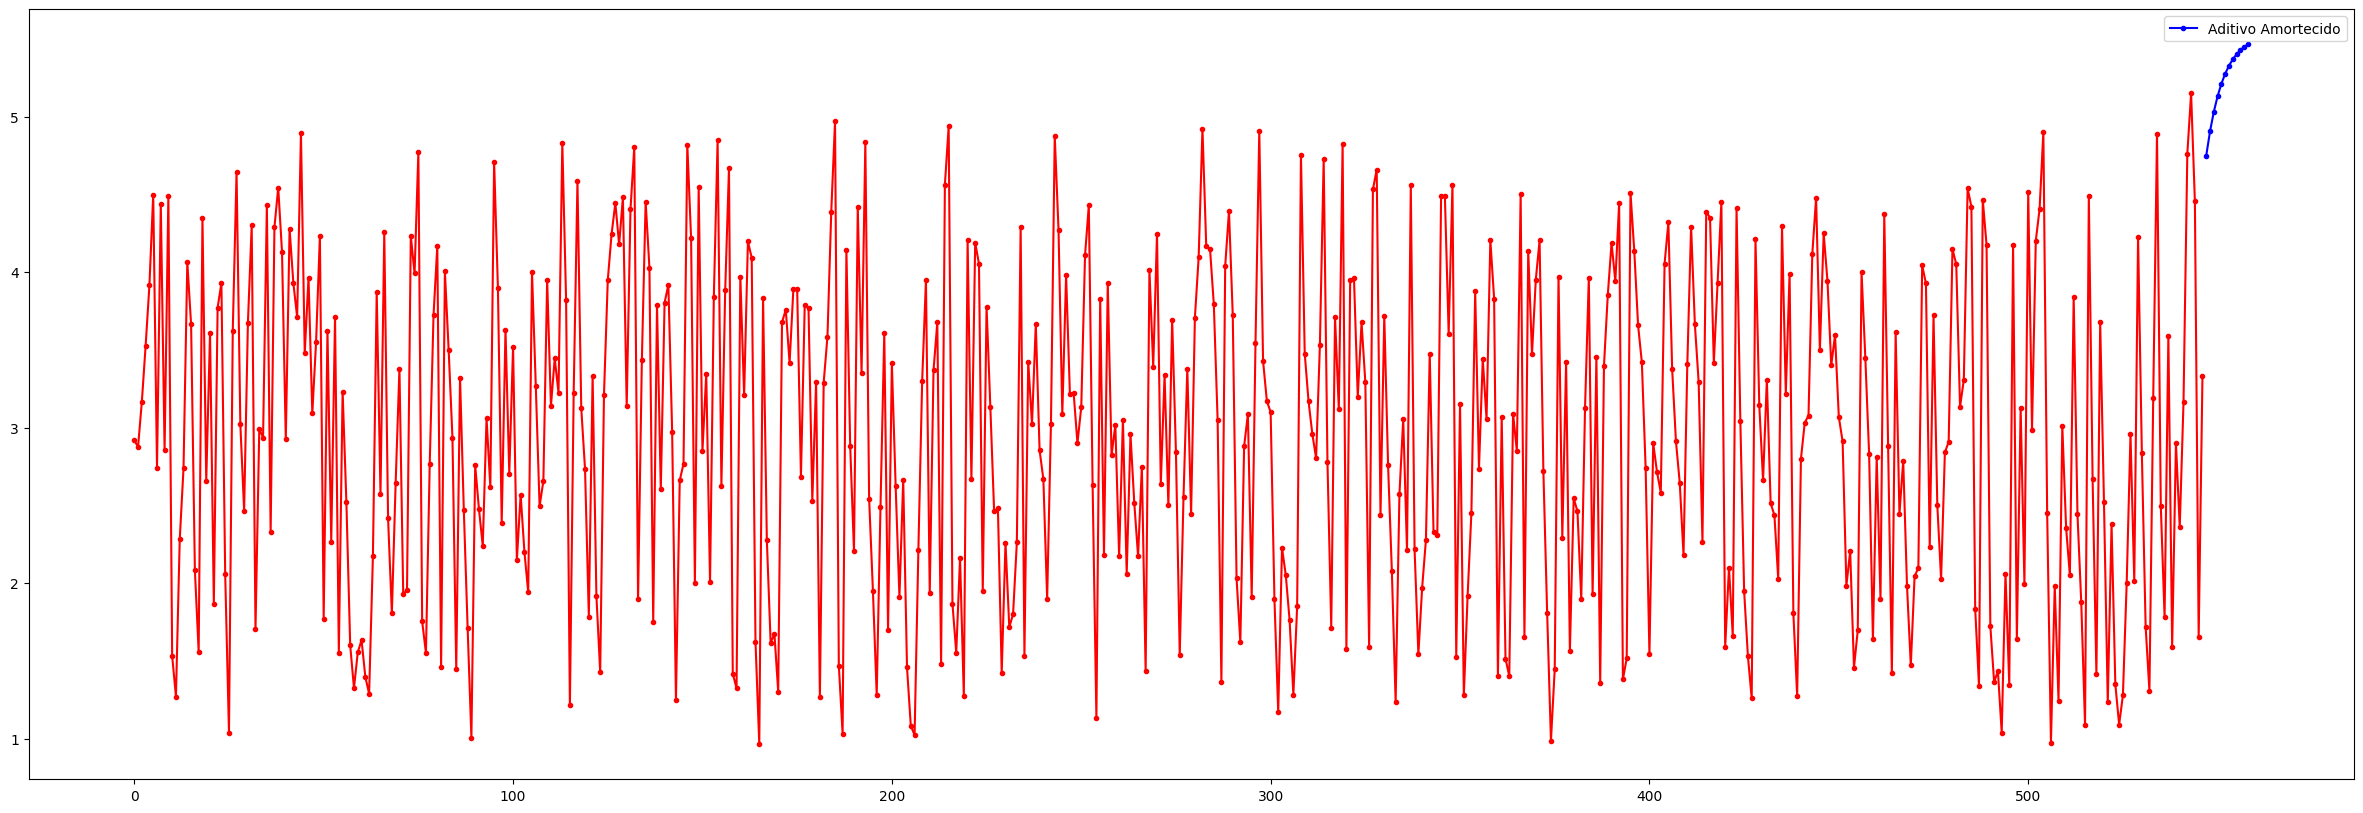

In [ ]:
# Suavização de Holt - Aditivo Amortecido
fit3=Holt(dado, damped = True).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
fcast3 = fit3.forecast(12).rename("Aditivo Amortecido")
fcast3.plot(marker='.', color='blue', legend = True)
fit3.fittedvalues.plot(marker='.', color='red')

<Axes: >

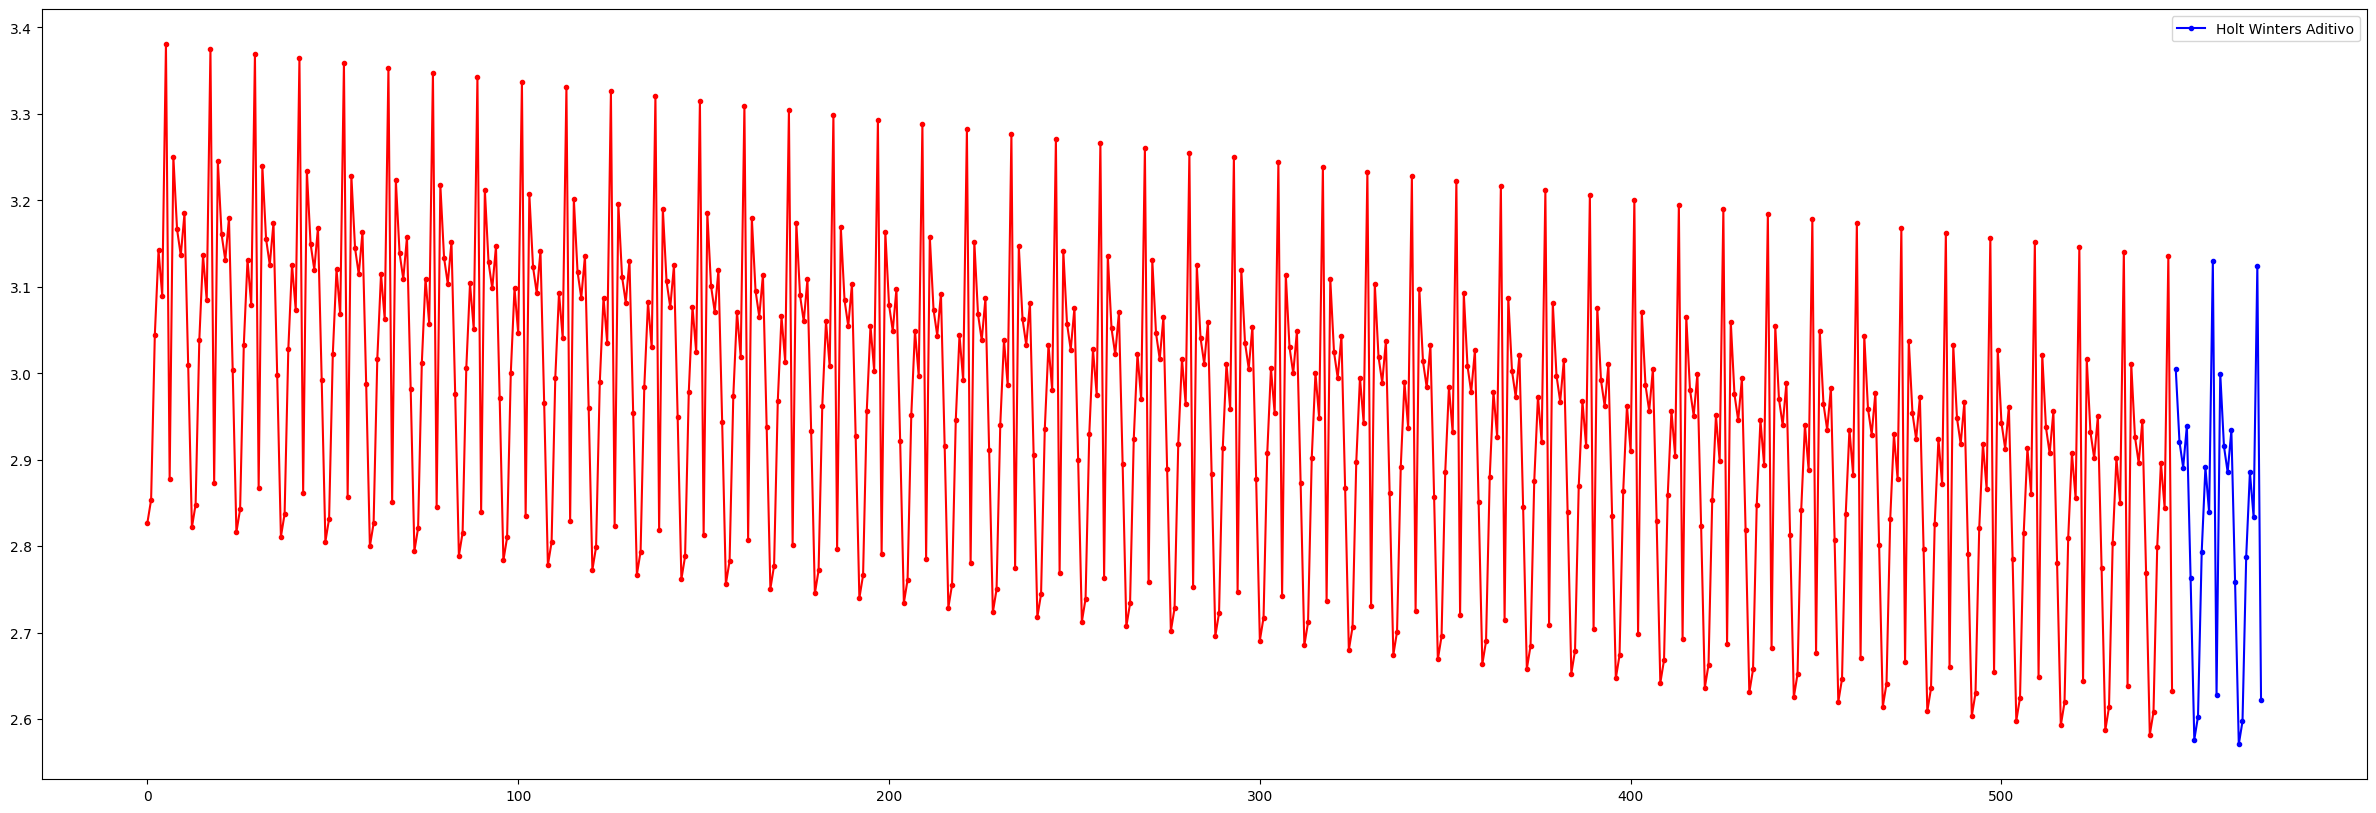

In [ ]:
# Holt Winters
fit4=ExponentialSmoothing(dado, seasonal_periods = 12, trend = 'additive', seasonal = 'additive' ).fit()
fcast4 = fit4.forecast(24).rename("Holt Winters Aditivo")
fcast4.plot(marker='.', color='blue', legend = True)
fit4.fittedvalues.plot(marker='.', color='red')

In [ ]:
data=data.astype('float32')

In [ ]:
#Separar dados de treino e teste
train = data[0:350]
test = data[350:]

In [ ]:
#Organizar os dados com um lag a frente
def prepare_data(data, lags=1):
  X,Y = [],[]
  for row in range(len(data)-lags-1):
    a=data[row:(row+lags)]
    X.append(a)
    Y.append(data[row+lags])
  return np.array(X),np.array(Y)

In [ ]:
lags=1
X_train, Y_train = prepare_data(train,lags)
X_test, Y_test = prepare_data(test,lags)
y_true = Y_test

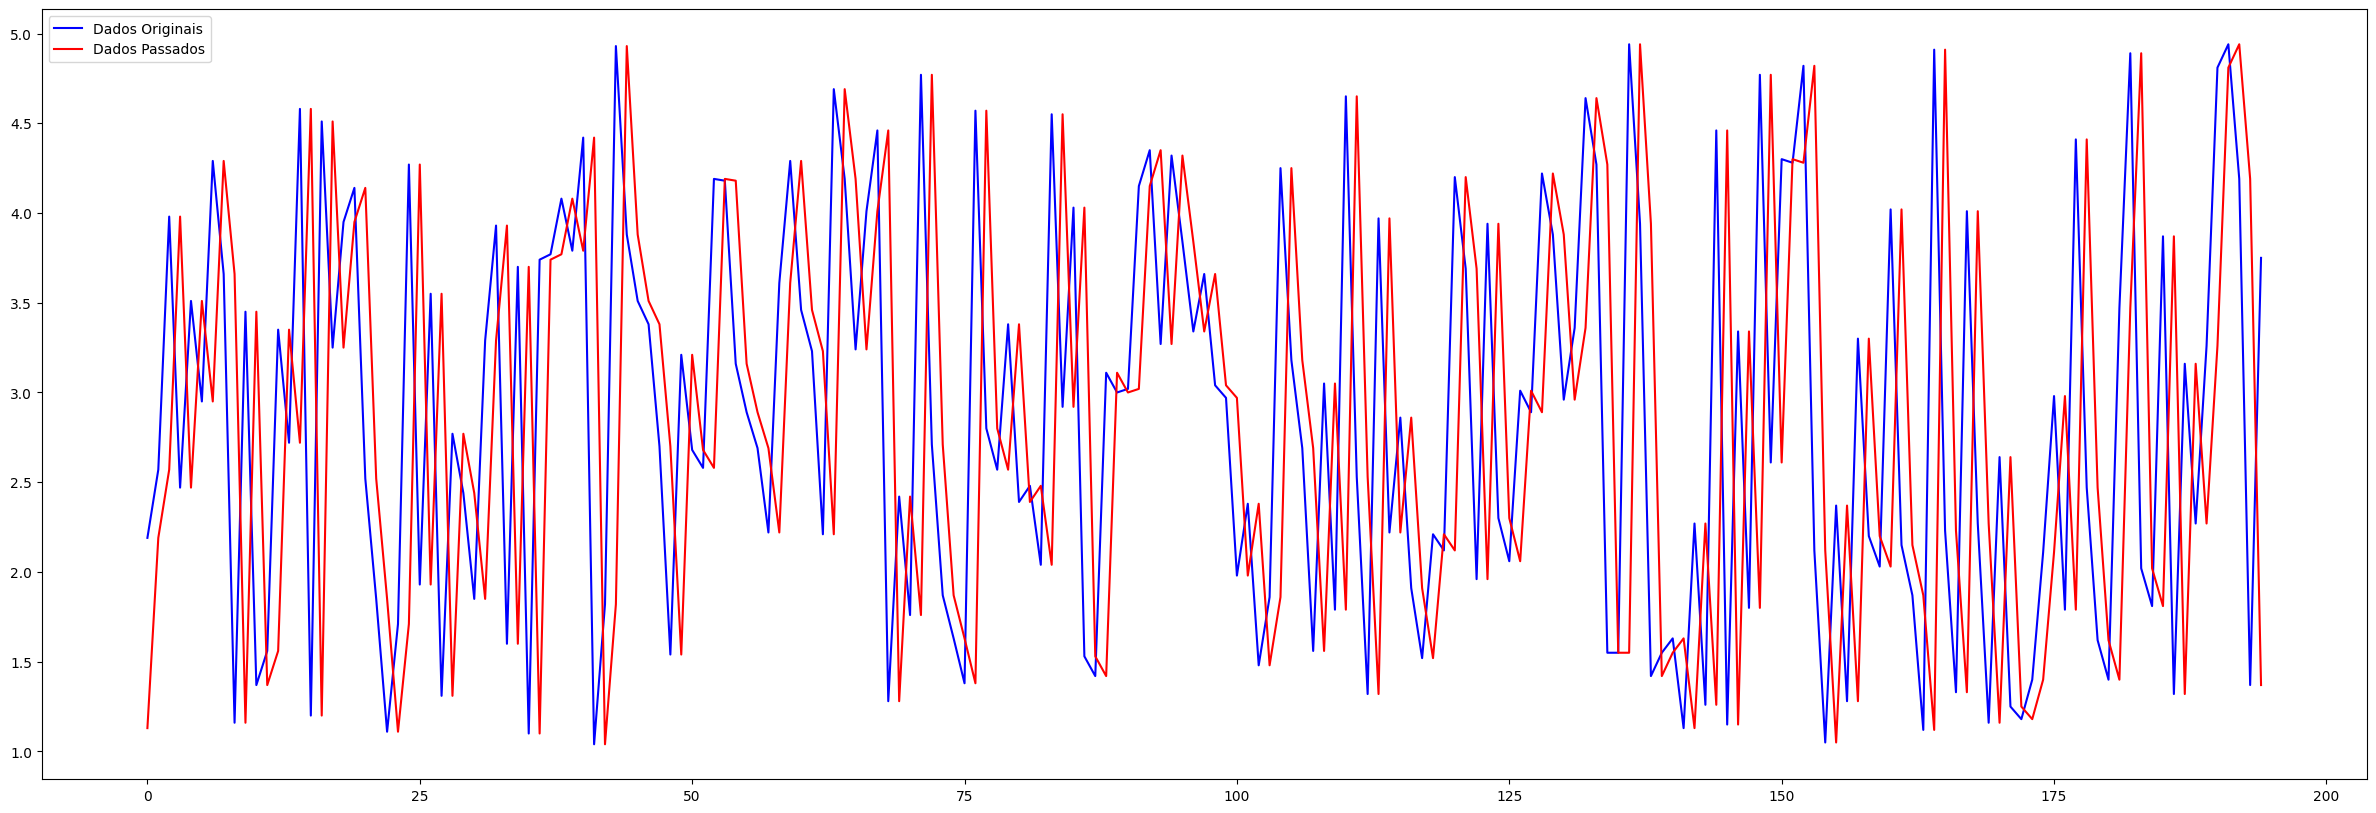

In [ ]:
plt.plot(Y_test, label='Dados Originais', color='blue')
plt.plot(X_test, label='Dados Passados', color='red')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Treinamento da rede
md1 = Sequential()
md1.add(Dense(3, input_dim=lags, activation='relu'))
md1.add(Dense(1))
md1.compile(loss='mean_squared_error', optimizer='adam')
md1.fit(X_train, Y_train, epochs=200, batch_size=2, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
174/174 - 1s - 8ms/step - loss: 2.4114
Epoch 2/200
174/174 - 1s - 3ms/step - loss: 2.2036
Epoch 3/200
174/174 - 0s - 1ms/step - loss: 2.1290
Epoch 4/200
174/174 - 0s - 2ms/step - loss: 2.0607
Epoch 5/200
174/174 - 0s - 2ms/step - loss: 1.9918
Epoch 6/200
174/174 - 0s - 1ms/step - loss: 1.9323
Epoch 7/200
174/174 - 0s - 2ms/step - loss: 1.8707
Epoch 8/200
174/174 - 0s - 2ms/step - loss: 1.8229
Epoch 9/200
174/174 - 0s - 2ms/step - loss: 1.7588
Epoch 10/200
174/174 - 0s - 2ms/step - loss: 1.7158
Epoch 11/200
174/174 - 0s - 2ms/step - loss: 1.6639
Epoch 12/200
174/174 - 0s - 2ms/step - loss: 1.6229
Epoch 13/200
174/174 - 0s - 2ms/step - loss: 1.5891
Epoch 14/200
174/174 - 1s - 4ms/step - loss: 1.5531
Epoch 15/200
174/174 - 0s - 2ms/step - loss: 1.5179
Epoch 16/200
174/174 - 0s - 2ms/step - loss: 1.4931
Epoch 17/200
174/174 - 1s - 3ms/step - loss: 1.4695
Epoch 18/200
174/174 - 0s - 2ms/step - loss: 1.4432
Epoch 19/200
174/174 - 0s - 2ms/step - loss: 1.4269
Epoch 20/200
174/174 

In [ ]:
train_predict = md1.predict(X_train)
test_predict = md1.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


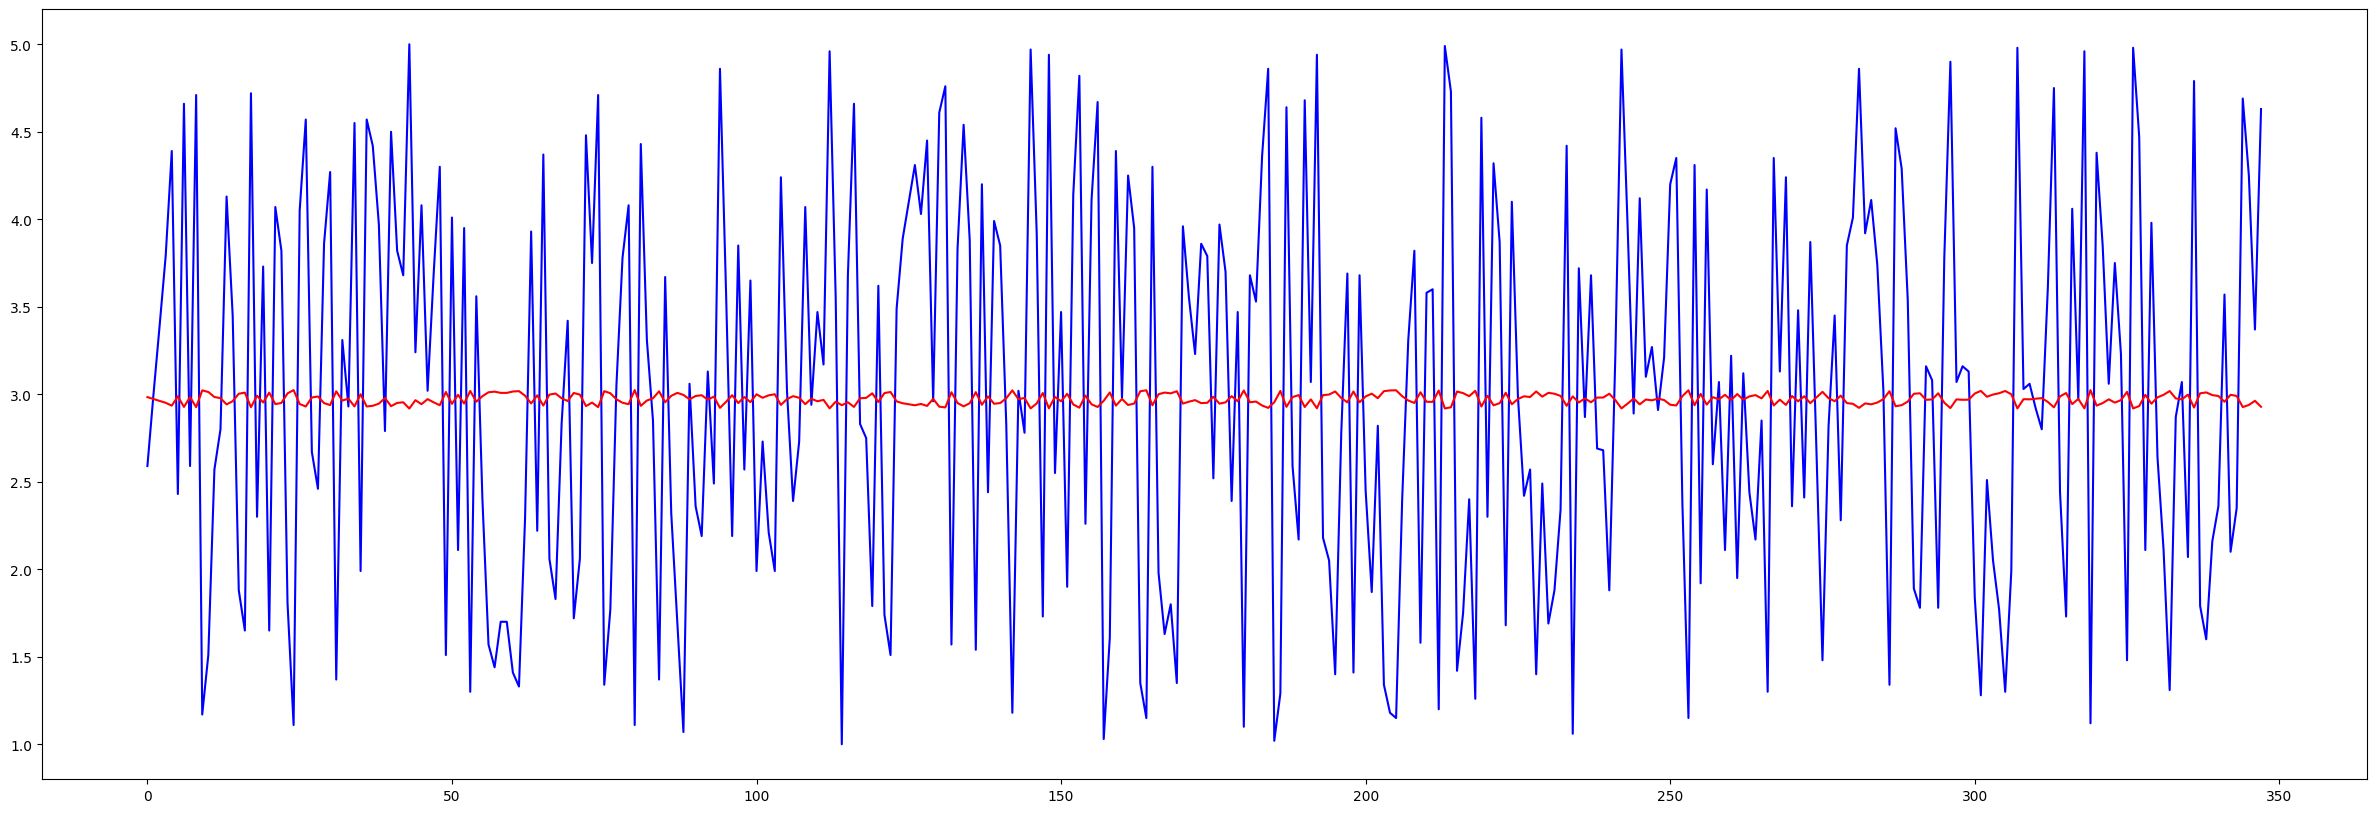

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,10
plt.plot(X_train, color='blue')
plt.plot(train_predict, color='red')
plt.show()

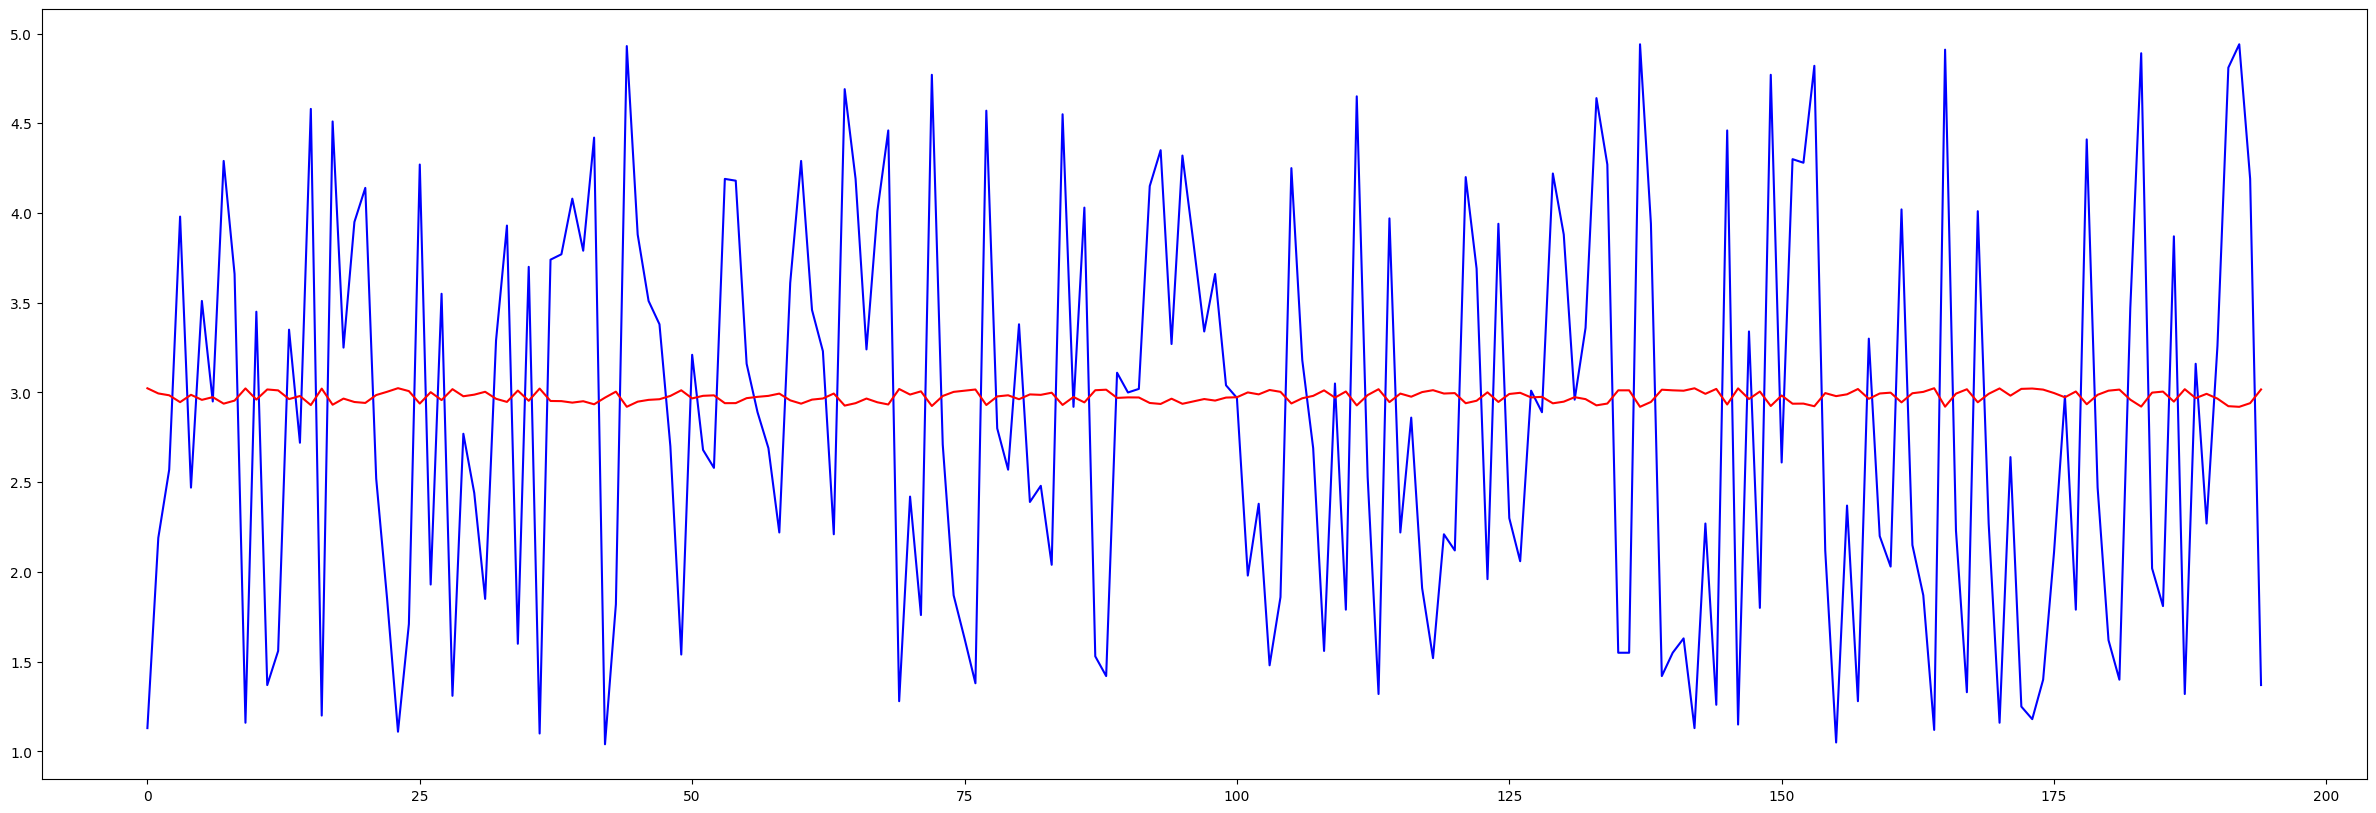

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,10
plt.plot(X_test, color='blue')
plt.plot(test_predict, color='red')
plt.show()

In [ ]:
#Análise de performance
train_score = md1.evaluate(X_train, Y_train, verbose=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2826 


In [ ]:
test_score= md1.evaluate(X_test, Y_test, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1898 
